In [3]:
import pandas as pd
import numpy as np

# Sample data for the DataFrame based on the description
data = {
    'Date': pd.date_range(start='1980-01-01', periods=480, freq='ME'),  # Changed 'M' to 'ME' for month-end frequency
    'Recession': [1 if year in [1980, 1981, 1982, 1991, 2000, 2001, 2007, 2008, 2009, 2020] and month in [1, 2, 3, 4] else 0 
                  for year in range(1980, 2020) for month in range(1, 13)][:480],
    'Automobile_Sales': np.random.randint(1000, 10000, size=480),
    'GDP': np.random.uniform(10000, 60000, size=480),
    'Unemployment_Rate': np.random.uniform(3, 10, size=480),
    'Consumer_Confidence': np.random.uniform(50, 120, size=480),
    'Seasonality_Weight': np.random.uniform(0.5, 1.5, size=480),
    'Price': np.random.uniform(20000, 50000, size=480),
    'Advertising_Expenditure': np.random.uniform(1000, 5000, size=480),
    'Vehicle_Type': np.random.choice(['Supperminicar', 'Smallfamilycar', 'Mediumfamilycar', 'Executivecar', 'Sports'], size=480),
    'Competition': np.random.uniform(1, 10, size=480),
    'Month': pd.date_range(start='1980-01-01', periods=480, freq='ME').month,  # Changed 'M' to 'ME'
    'Year': pd.date_range(start='1980-01-01', periods=480, freq='ME').year   # Changed 'M' to 'ME'
}

df = pd.DataFrame(data)
print(df)


          Date  Recession  Automobile_Sales           GDP  Unemployment_Rate  \
0   1980-01-31          1              2696  24795.692918           3.312278   
1   1980-02-29          1              2837  22658.484648           8.061861   
2   1980-03-31          1              8942  33085.205873           7.405295   
3   1980-04-30          1              8825  44198.667275           7.471830   
4   1980-05-31          0              9248  28678.711695           4.418566   
..         ...        ...               ...           ...                ...   
475 2019-08-31          0              2441  40378.457309           9.363248   
476 2019-09-30          0              9552  52425.839372           7.432600   
477 2019-10-31          0              1619  54929.274412           7.067254   
478 2019-11-30          0              2867  58504.917811           6.679891   
479 2019-12-31          0              5766  41444.622239           7.639633   

     Consumer_Confidence  Seasonality_W

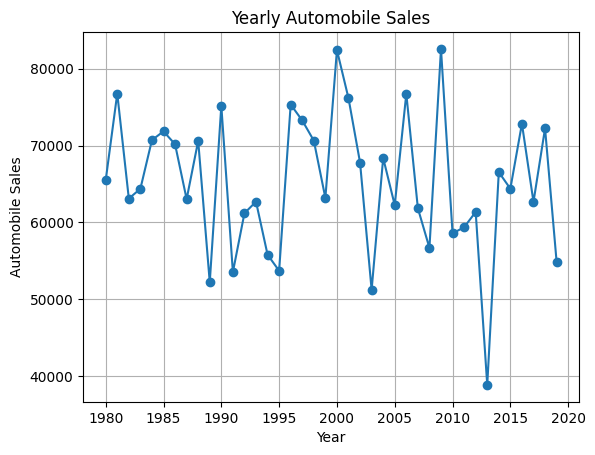

In [4]:
import matplotlib.pyplot as plt

# Grouping by Year to sum the automobile sales and plot the line chart
df.groupby('Year')['Automobile_Sales'].sum().plot(kind='line', marker='o')

plt.title('Yearly Automobile Sales')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()


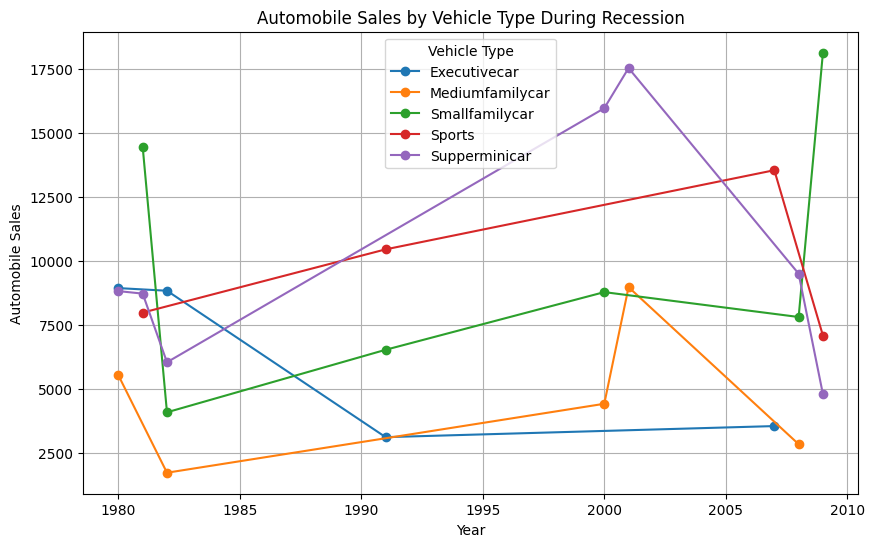

In [5]:
vehicle_types = df.groupby(['Year', 'Vehicle_Type', 'Recession'])['Automobile_Sales'].sum().reset_index()

plt.figure(figsize=(10,6))
for vehicle_type in vehicle_types['Vehicle_Type'].unique():
    subset = vehicle_types[(vehicle_types['Vehicle_Type'] == vehicle_type) & (vehicle_types['Recession'] == 1)]
    plt.plot(subset['Year'], subset['Automobile_Sales'], marker='o', label=vehicle_type)

plt.title('Automobile Sales by Vehicle Type During Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()


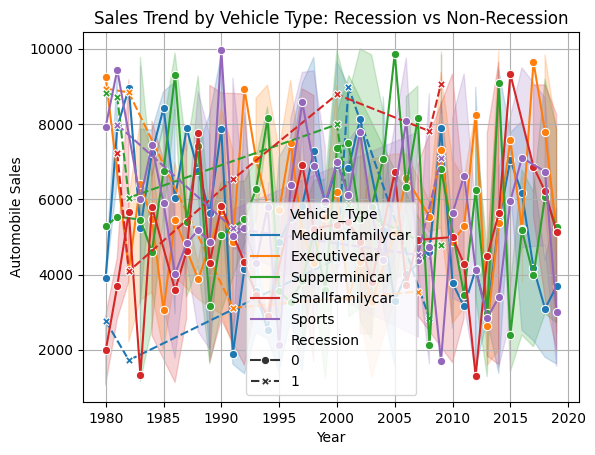

In [6]:
import seaborn as sns

sns.lineplot(data=df, x='Year', y='Automobile_Sales', hue='Vehicle_Type', style='Recession', markers=True)
plt.title('Sales Trend by Vehicle Type: Recession vs Non-Recession')
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()


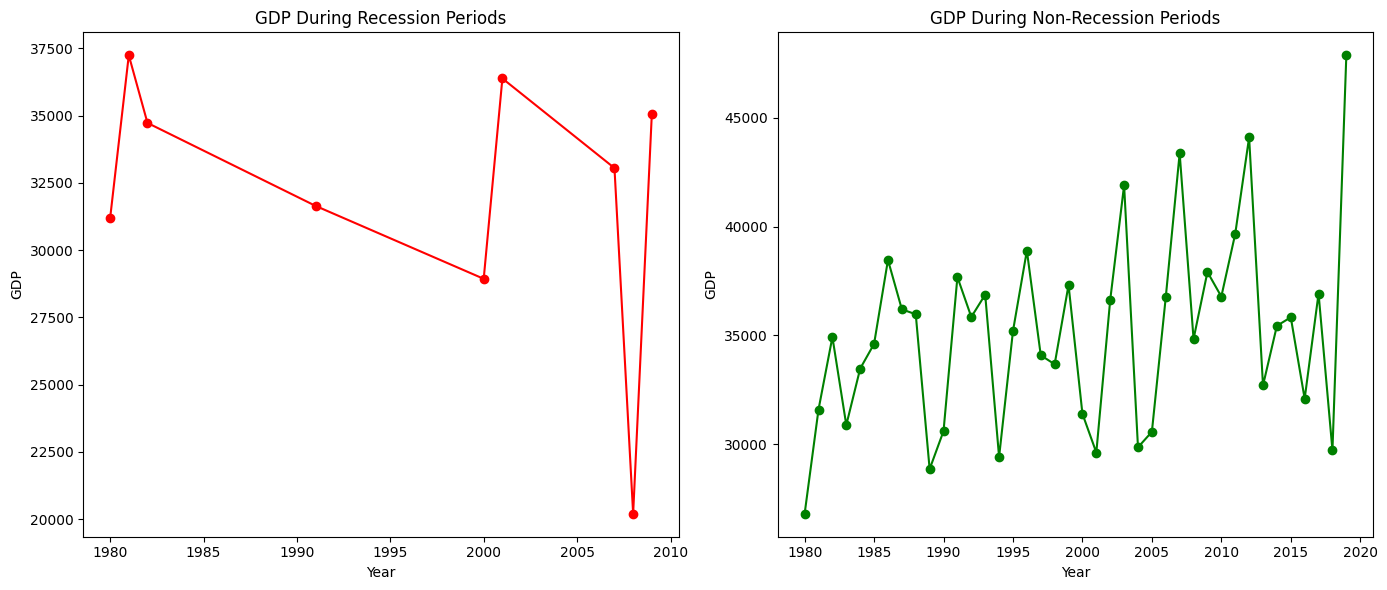

In [7]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# GDP During Recession
recession_gdp = df[df['Recession'] == 1].groupby('Year')['GDP'].mean()
ax[0].plot(recession_gdp.index, recession_gdp.values, marker='o', color='r')
ax[0].set_title('GDP During Recession Periods')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('GDP')

# GDP During Non-Recession
non_recession_gdp = df[df['Recession'] == 0].groupby('Year')['GDP'].mean()
ax[1].plot(non_recession_gdp.index, non_recession_gdp.values, marker='o', color='g')
ax[1].set_title('GDP During Non-Recession Periods')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('GDP')

plt.tight_layout()
plt.show()


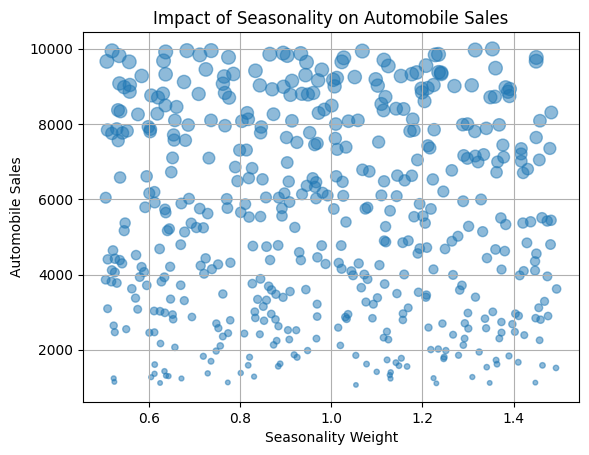

In [8]:
plt.scatter(df['Seasonality_Weight'], df['Automobile_Sales'], s=df['Automobile_Sales']/100, alpha=0.5)
plt.title('Impact of Seasonality on Automobile Sales')
plt.xlabel('Seasonality Weight')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()


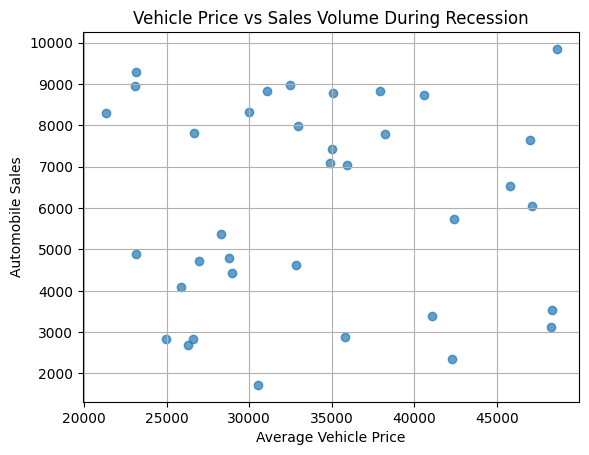

In [9]:
df_recession = df[df['Recession'] == 1]
plt.scatter(df_recession['Price'], df_recession['Automobile_Sales'], alpha=0.7)
plt.title('Vehicle Price vs Sales Volume During Recession')
plt.xlabel('Average Vehicle Price')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()


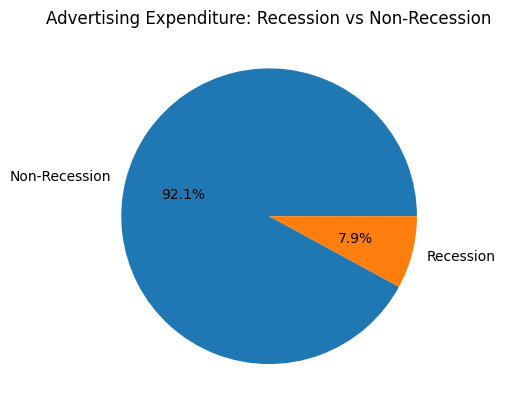

In [10]:
advertising_exp = df.groupby('Recession')['Advertising_Expenditure'].sum()
advertising_exp.plot(kind='pie', autopct='%1.1f%%', labels=['Non-Recession', 'Recession'])
plt.title('Advertising Expenditure: Recession vs Non-Recession')
plt.ylabel('')
plt.show()


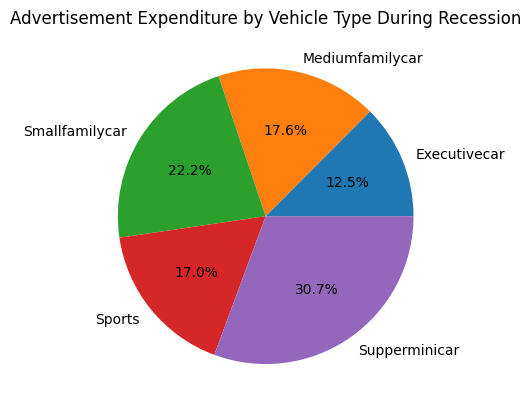

In [11]:
ad_exp_by_type = df[df['Recession'] == 1].groupby('Vehicle_Type')['Advertising_Expenditure'].sum()
ad_exp_by_type.plot(kind='pie', autopct='%1.1f%%')
plt.title('Advertisement Expenditure by Vehicle Type During Recession')
plt.ylabel('')
plt.show()


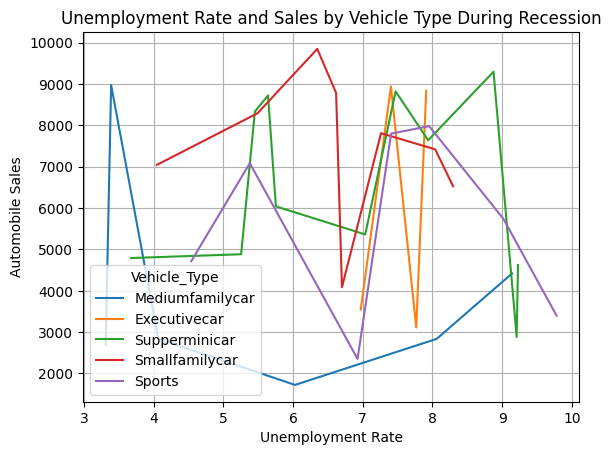

In [12]:
recession_data = df[df['Recession'] == 1]
sns.lineplot(data=recession_data, x='Unemployment_Rate', y='Automobile_Sales', hue='Vehicle_Type')
plt.title('Unemployment Rate and Sales by Vehicle Type During Recession')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.grid(True)
plt.show()
